# Fish Picture Classification

## 1. Import Packages

In [1]:
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

Using TensorFlow backend.


## 2. Parameter Setting

In [2]:
train_data_directory = './images/train'
test_data_directory = './images/test'

img_width, img_height = 100, 100

nb_train_samples = 800
nb_validation_samples = 200

batch_size = 32
epochs = 200

## 3. Data Augmentation

In [3]:
train_data_generator = ImageDataGenerator(rescale=1. / 255,
                                          rotation_range = 90,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          zoom_range = 0.3,
                                          horizontal_flip = True)

test_data_generator = ImageDataGenerator(rescale=1. / 255)

# 在这里需要对训练数据进行数据扩展，需要进行参数设置
# 对于测试数据集我们需要使用原数据，只进行标准化操作

In [4]:
train_gen = train_data_generator.flow_from_directory(train_data_directory,
                                                           target_size=(img_width, img_height),
                                                           batch_size=batch_size,
                                                           class_mode='categorical')

validation_gen = test_data_generator.flow_from_directory(test_data_directory,
                                                               target_size=(img_width, img_height),
                                                               batch_size=batch_size,
                                                               class_mode='categorical')

# 二分类任务class_mode使用“binary”
# 多分类任务class_mode使用“categorical”

Found 2400 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


## 4. Model Building

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation="relu")) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(6, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
__________

## 5. Callbacks Setting

### 5.1. TensorBoard

In [6]:
import keras.callbacks as callbacks

In [7]:
tensor_board = callbacks.TensorBoard(log_dir='./logs')

# 设置TensorBoard的log路径：”./logs“即”/Users/caiyutong/Desktop/Keras/Fish\ Picture\ Classification/logs“

# 激活TensorFlow环境：conda activate tensorflow
# 启动TensorBoard：tensorboard --logdir /Users/caiyutong/Desktop/Keras/Fish\ Picture\ Classification/logs 
# 注：”tensorboard --logdir <PATH>“中的”<PATH>“即为我们设置的日志路径的完整路径（从计算机根目录开始）

### 5.2. ReduceLROnPlateau

In [8]:
from keras.callbacks import ReduceLROnPlateau

In [9]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=20, mode='auto')

### 5.3. MyCallbacks: Learning Rate Callback

In [10]:
from keras.callbacks import Callback
import keras.backend as K

In [11]:
class LearningRateHistory(Callback):
    def on_train_begin(self, logs={}):
        self.lrHistory = []

    def on_epoch_end(self, epoch, logs={}):
        lr = K.get_value(model.optimizer.lr)
        self.lrHistory.append(lr)
        print('Current Learning Rate: ' + str(lr))

In [12]:
lrHistory = LearningRateHistory()

## 6. Model Training

In [13]:
model.fit_generator(generator=train_gen,
                    steps_per_epoch=nb_train_samples // batch_size,
                    epochs=epochs,
                    callbacks=[tensor_board, reduce_lr, lrHistory],
                    validation_data=validation_gen,
                    validation_steps=nb_validation_samples // batch_size)

Epoch 1/200
25/25 [==============================] - 17s 680ms/step - loss: 1.8175 - acc: 0.1875 - val_loss: 1.7724 - val_acc: 0.1875
Current Learning Rate: 0.001
Epoch 2/200
25/25 [==============================] - 17s 681ms/step - loss: 1.7657 - acc: 0.2400 - val_loss: 1.8112 - val_acc: 0.1823
Current Learning Rate: 0.001
Epoch 3/200
25/25 [==============================] - 17s 682ms/step - loss: 1.6991 - acc: 0.2762 - val_loss: 1.5538 - val_acc: 0.3542
Current Learning Rate: 0.001
Epoch 4/200
25/25 [==============================] - 18s 729ms/step - loss: 1.6016 - acc: 0.3287 - val_loss: 1.3305 - val_acc: 0.5598
Current Learning Rate: 0.001
Epoch 5/200
25/25 [==============================] - 13s 540ms/step - loss: 1.5823 - acc: 0.3588 - val_loss: 1.5624 - val_acc: 0.4010
Current Learning Rate: 0.001
Epoch 6/200
25/25 [==============================] - 15s 616ms/step - loss: 1.5064 - acc: 0.3962 - val_loss: 1.1594 - val_acc: 0.5781
Current Learning Rate: 0.001
Epoch 7/200
25/25 [===

25/25 [==============================] - 16s 659ms/step - loss: 1.0474 - acc: 0.6238 - val_loss: 0.8080 - val_acc: 0.7174
Current Learning Rate: 0.001
Epoch 52/200
25/25 [==============================] - 15s 598ms/step - loss: 0.9577 - acc: 0.6475 - val_loss: 0.6639 - val_acc: 0.7344
Current Learning Rate: 0.001
Epoch 53/200
25/25 [==============================] - 16s 635ms/step - loss: 0.9982 - acc: 0.6275 - val_loss: 0.5764 - val_acc: 0.7865
Current Learning Rate: 0.001
Epoch 54/200
25/25 [==============================] - 16s 642ms/step - loss: 0.9957 - acc: 0.6725 - val_loss: 0.6407 - val_acc: 0.7663
Current Learning Rate: 0.001
Epoch 55/200
25/25 [==============================] - 15s 611ms/step - loss: 0.9534 - acc: 0.6613 - val_loss: 0.6651 - val_acc: 0.7552
Current Learning Rate: 0.001
Epoch 56/200
25/25 [==============================] - 16s 638ms/step - loss: 0.9147 - acc: 0.6562 - val_loss: 0.6401 - val_acc: 0.7552
Current Learning Rate: 0.001
Epoch 57/200
25/25 [=========

25/25 [==============================] - 16s 630ms/step - loss: 0.7766 - acc: 0.7200 - val_loss: 0.6229 - val_acc: 0.8021
Current Learning Rate: 0.001
Epoch 102/200
25/25 [==============================] - 17s 689ms/step - loss: 0.8416 - acc: 0.7150 - val_loss: 0.7605 - val_acc: 0.7174
Current Learning Rate: 0.001
Epoch 103/200
25/25 [==============================] - 14s 579ms/step - loss: 0.7727 - acc: 0.7362 - val_loss: 0.5914 - val_acc: 0.7917
Current Learning Rate: 0.001
Epoch 104/200
25/25 [==============================] - 16s 632ms/step - loss: 0.8142 - acc: 0.7100 - val_loss: 0.6405 - val_acc: 0.7760
Current Learning Rate: 0.001
Epoch 105/200
25/25 [==============================] - 17s 666ms/step - loss: 0.8018 - acc: 0.7238 - val_loss: 0.8309 - val_acc: 0.6793
Current Learning Rate: 0.001
Epoch 106/200
25/25 [==============================] - 15s 586ms/step - loss: 0.8604 - acc: 0.7000 - val_loss: 0.5701 - val_acc: 0.7552
Current Learning Rate: 0.001
Epoch 107/200
25/25 [===

25/25 [==============================] - 16s 649ms/step - loss: 0.5974 - acc: 0.8100 - val_loss: 0.3676 - val_acc: 0.8804
Current Learning Rate: 1.0000001e-05
Epoch 150/200
25/25 [==============================] - 16s 650ms/step - loss: 0.5464 - acc: 0.8237 - val_loss: 0.3490 - val_acc: 0.8646
Current Learning Rate: 1.0000001e-05
Epoch 151/200
25/25 [==============================] - 16s 645ms/step - loss: 0.5616 - acc: 0.7987 - val_loss: 0.5015 - val_acc: 0.8229
Current Learning Rate: 1.0000001e-05
Epoch 152/200
25/25 [==============================] - 16s 621ms/step - loss: 0.6111 - acc: 0.7863 - val_loss: 0.4546 - val_acc: 0.8424
Current Learning Rate: 1.0000001e-05
Epoch 153/200
25/25 [==============================] - 16s 642ms/step - loss: 0.5461 - acc: 0.7963 - val_loss: 0.4144 - val_acc: 0.8333
Current Learning Rate: 1.0000001e-05
Epoch 154/200
25/25 [==============================] - 16s 621ms/step - loss: 0.6477 - acc: 0.7812 - val_loss: 0.4486 - val_acc: 0.8542
Current Learn

## 7. Model Evaluation

In [14]:
test_loss, test_acc = model.evaluate_generator(validation_gen, nb_validation_samples)

In [15]:
print("Accuracy = ",test_acc)

Accuracy =  0.8495253165311452


## 8. Save Model

In [17]:
model.save_weights('fish_model_weights.h5')

## 9. Ploting

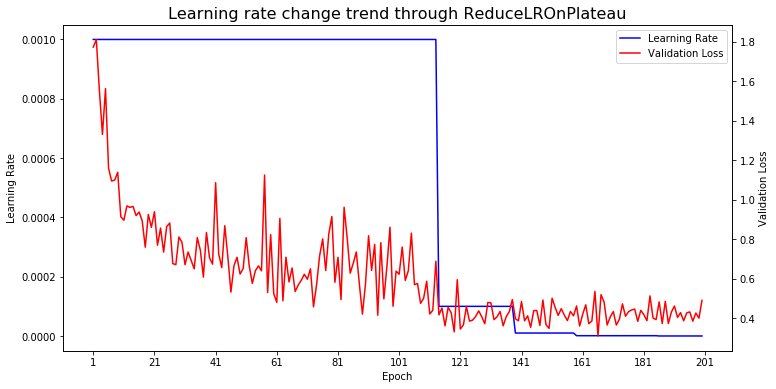

In [19]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))

x = np.array(range(epochs))
y1 = np.array(lrHistory.lrHistory)
y2 = model.history.history['val_loss']


ax1 = fig.add_subplot(1,1,1)
ax1.plot(x, y1, 'b-', label='Learning Rate')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-', label='Validation Loss')

ax1.set_xticks(range(0,201,20))
ax1.set_xticklabels(range(1,202,20))

ax1.set_title('Learning rate change trend through ReduceLROnPlateau', size=16)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Learning Rate',)
ax2.set_ylabel('Validation Loss')

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1+handles2, labels1+labels2, loc='upper right')
plt.show()

# - END -